In [6]:
from modelname.dataset import ServiceNetworkDataset
import numpy as np

data = ServiceNetworkDataset()
demand = data.get_demands() / 180

# Sum by rows (total demand per origin)
row_sums = np.floor(demand.sum(axis=1)).astype(int)

# Sum by columns (total demand per destination)
col_sums = np.floor(demand.sum(axis=0)).astype(int)

total_sum_by_location = row_sums + col_sums
# Display results

print("Total Demand Sums per location:\n", total_sum_by_location)

Total Demand Sums per location:
 [ 186   58  175   35   73    3  191   14   38    4   42    0   19   27
    0   15  167  400   41  656   14  452    3   15   11 1921    0   96
   88    6  133    0   95   98    0  601  133    0    0    5    4  109
  250  132   15 1974   67  399    0  648    0    0   23    3    6  548
  217   11  593    0    5    0    0   13    7   79    0  475    2  119
    0    8    0    0    0   67   17    0   40  275   15    2    0   24
    0    0    0   11    0    6   23  314    0    3 2127   11  703   10
  584    2   76    0   36]


Initial DataFrame shape: (1, 103)
               V0  V1   V2  V3  V4  V5   V6  V7  V8  V9  ...  V93   V94  V95  \
Total Demand  186  58  175  35  73   3  191  14  38   4  ...    3  2127   11   

              V96  V97  V98  V99  V100  V101  V102  
Total Demand  703   10  584    2    76     0    36  

[1 rows x 103 columns]

Filtered DataFrame (nonzero demands) shape: (1, 77)
               V0  V1   V2  V3  V4  V5   V6  V7  V8  V9  ...  V91  V93   V94  \
Total Demand  186  58  175  35  73   3  191  14  38   4  ...  314    3  2127   

              V95  V96  V97  V98  V99  V100  V102  
Total Demand   11  703   10  584    2    76    36  

[1 rows x 77 columns]
Selected location indices: ['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V27', 'V28', 'V29', 'V30', 'V32', 'V33', 'V35', 'V36', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V49', 'V52', 'V53', 'V54', '

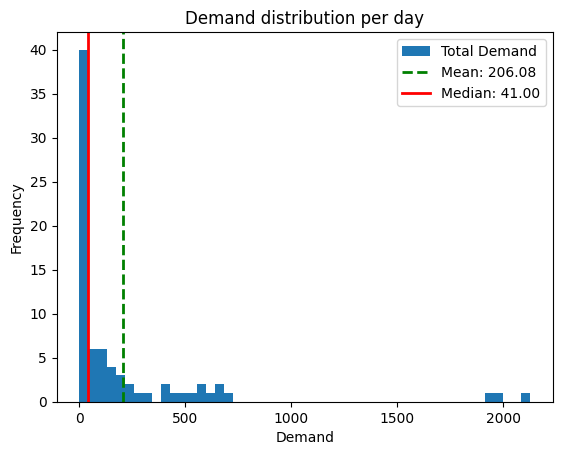

In [29]:
from matplotlib import pyplot as plt
import pandas as pd
# 2) Create a single-row DataFrame:
#    - Row index name: "Total Demand"
#    - Column names: "Location_0", "Location_1", ...
df_demand_sum = pd.DataFrame([total_sum_by_location],
                  index=["Total Demand"],
                  columns=[f"V{i}" for i in range(len(total_sum_by_location))])

print("Initial DataFrame shape:", df_demand_sum.shape)
print(df_demand_sum)

# 3) Filter out columns with value == 0:
#    We only keep columns whose value is > 0 in this single row.
df_demand_sum_filtered = df_demand_sum.loc[:, (df_demand_sum > 0).all(axis=0)]

print("\nFiltered DataFrame (nonzero demands) shape:", df_demand_sum_filtered.shape)
print(df_demand_sum_filtered)

selected_locations = df_demand_sum_filtered.columns.tolist()
median_demand = df_demand_sum_filtered.stack().median()
mean_demand = df_demand_sum_filtered.stack().mean()

print("Selected location indices:", selected_locations)
print("Median of nonzero demands:", median_demand)
print("Mean of nonzero demands:", mean_demand)

# 4) Draw a histogram of the remaining demands:
#    Since the data is in a single row, we transpose to get them in one column.
df_demand_sum_filtered.T.plot(kind='hist', bins=50, legend=False)
plt.axvline(mean_demand, color='green', linestyle='dashed', linewidth=2,
            label=f'Mean: {mean_demand:.2f}')
plt.axvline(median_demand, color='red', linestyle='solid', linewidth=2,
            label=f'Median: {median_demand:.2f}')
plt.legend(loc='upper right')
plt.xlabel("Demand")
plt.title("Demand distribution per day")
plt.show()

             V0         V1         V2         V3         V4         V5  \
V0     0.000000  11.292653  33.596340  16.995028  16.350985  28.637030   
V1    11.292653   0.000000  23.194169   6.180097   5.276178  18.588460   
V2    33.596340  23.194169   0.000000  17.014168  20.036394   5.158020   
V3    16.995028   6.180097  17.014168   0.000000   4.740377  12.461328   
V4    16.350985   5.276178  20.036394   4.740377   0.000000  16.084397   
...         ...        ...        ...        ...        ...        ...   
V98   27.196327  16.477542  18.294295  13.563003  11.218247  17.102919   
V99    6.835307   6.544502  29.716044  12.711896  10.584148  25.132202   
V100  21.363038  10.178247  16.626244   6.699354   5.020195  13.605761   
V101  32.196732  20.916020  12.030005  15.967611  15.934988  12.894413   
V102   2.562902  13.832302  35.891852  19.443499  18.912218  30.883565   

             V6         V7         V8         V9  ...        V93        V94  \
V0    18.404470  25.659757  19.1

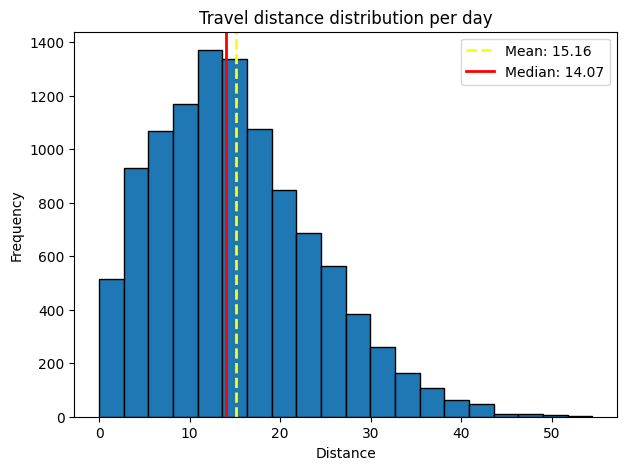

In [28]:
distances = data.get_distances()

N = distances.shape[0]

# Create a list of labels: ['V0', 'V1', ..., 'V(N-1)']
labels = [f"V{i}" for i in range(N)]

# Build a DataFrame with these row and column names
distances_df = pd.DataFrame(distances, index=labels, columns=labels)

print(distances_df)

distance_matrix_filtered = distances_df.loc[selected_locations, selected_locations]
print("Filtered distance matrix shape:", distance_matrix_filtered.shape)

# 1) Convert the DataFrame to a NumPy array and flatten
distances_array = distances_df.to_numpy().flatten()

# 2) Calculate mean and median
dist_mean = distances_array.mean()
dist_median = np.median(distances_array)

print(f"Mean distance: {dist_mean:.2f} km")
print(f"Median distance: {dist_median:.2f} km")

# Plot a histogram
plt.figure(figsize=(7,5))
plt.hist(distances_array, bins=20, edgecolor='black')
plt.axvline(dist_mean, color='yellow', linestyle='dashed', linewidth=2,
            label=f'Mean: {dist_mean:.2f}')
plt.axvline(dist_median, color='red', linestyle='solid', linewidth=2,
            label=f'Median: {dist_median:.2f}')
plt.legend(loc='upper right')
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Travel distance distribution")
plt.show()